# $D_{s1}(2460)^+\to D_s^+\gamma$ production study
## Yields
### MonteCarlo analysis
#### $\eta(D_s^+\gamma)$ intervals for MC simulations: Fits

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT
from datetime import datetime
import numpy as np
import sys 
import uncertainties as un
import pandas as pd
import matplotlib.pyplot as plt
import os
#ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh

print(datetime.now())

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()

%jsroot

Welcome to JupyROOT 6.28/04
2024-04-09 10:23:03.319204
-------------------------
Set LHCb Style - May 2021
-------------------------


In [2]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

if not os.path.exists("./root_files"):
    os.makedirs("./root_files")
else:
    print("root_files directory already exists")
    
if not os.path.exists("./Tables"):
    os.makedirs("./Tables")
else:
    print("Tables directory already exists")
    
if not os.path.exists("./Results"):
    os.makedirs("./Results")
else:
    print("Tables directory already exists")

Graphs directory already exists
root_files directory already exists
Tables directory already exists
Tables directory already exists


## RDataFrame definition

In [3]:
priv = False
Filt = True

if priv:
    MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Private/'
else:
    if Filt:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/TightCut/'
    else:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/DecProdCut/'
    
dtt = "DsGammaTuple"

tdf_Dsst = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+"DsstDsGamma*.root")
tdf_Dsst = tdf_Dsst.Define("DsgM", "Dsg_M-Ds_M+1969")

tdf_Ds1 = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+"Ds1DsGamma*.root")
tdf_Ds1 = tdf_Ds1.Define("DsgM", "Dsg_M-Ds_M+1969")

## TRUEIDs and MCMatching

In [4]:
TRUEID = rsh.TRUEIDs()
TRUEID_dtt = TRUEID[dtt]

TRUEID_Dsst = TRUEID_dtt["DsstDsGamma"]
TRUEID_Ds1 = TRUEID_dtt["Ds1DsGamma"]

tdf_Dsst_sig = tdf_Dsst.Filter(TRUEID_Dsst)
tdf_Ds1_sig = tdf_Ds1.Filter(TRUEID_Ds1)

In [5]:
off_sel  = "gamma_PT > 1200 && gamma_CL > 0.7 && abs(Ds_M-1969) < 20 && DsgM < 2700"
nPVs_req = "nPVs == 1"

L0_cond    = "(Ds_L0HadronDecision_TOS == 1 | Dsg_L0Global_TIS == 1)"
HLT1_cond  = "(Ds_Hlt1TrackMVADecision_TOS == 1 | Ds_Hlt1TwoTrackMVADecision_TOS == 1)"
HLT2_cond  = "(Ds_Hlt2CharmHadDspToKmKpPipDecision_TOS == 1)"
trig_conds = "{0} && {1} && {2}".format(L0_cond, HLT1_cond, HLT2_cond) 

MC_sel   = "{0} && {1} && {2}".format(off_sel, nPVs_req, trig_conds)

tdf_Dsst_sig_sel = tdf_Dsst_sig.Filter(MC_sel)
tdf_Ds1_sig_sel = tdf_Ds1_sig.Filter(MC_sel)

### $\mathrm{N_{Tracks}^{VELO}}$ intervals

In [6]:
eta_intervals = [[1.76, 2.48], [2.48, 2.78], [2.78, 3.06], [3.06, 3.36], [3.36, 4.36]]

ninters = len(eta_intervals)

eta_cuts = ["Dsg_ETA > {0} && Dsg_ETA <= {1}".format(inter[0], inter[1]) for inter in eta_intervals]

Dsst_mass = "DsgM > 2050 && DsgM < 2250"
Ds1_mass = "DsgM > 2350 && DsgM < 2600"

MC_Dsg_Dsst_mass_sel_eta_cuts_hist = [tdf_Dsst_sig_sel.Filter("{0} && {1}".format(Dsst_mass, inter)).Histo1D(("","",100,2050,2250), "DsgM") for inter in eta_cuts] 
MC_Dsg_Ds1_mass_sel_eta_cuts_hist  = [tdf_Ds1_sig_sel.Filter("{0} && {1}".format(Ds1_mass, inter)).Histo1D(("","",100,2350,2600), "DsgM") for inter in eta_cuts] 

In [7]:
i = 0; j = 0

c1 = ROOT.TCanvas("", "", 800, 600)
lgd = ROOT.TLegend(0.57, 0.44, 0.92, 0.87)
for x in MC_Dsg_Dsst_mass_sel_eta_cuts_hist:
    i += 1
    rsh.TH1D_plot(x, color=i, norm=True)
rsh.legend_plot(lgd, [x.GetPtr() for x in MC_Dsg_Dsst_mass_sel_eta_cuts_hist], 
                ["{0}º nVeloTracks interval".format(i+1) for i in range(len(MC_Dsg_Dsst_mass_sel_eta_cuts_hist))],
                ["l" for x in MC_Dsg_Dsst_mass_sel_eta_cuts_hist])
c1.Draw()
c1.SaveAs("Graphs/Sim_Dsg_mass_Dsst_eta_cuts.pdf")

c2 = ROOT.TCanvas("", "", 800, 600)
lgd2 = ROOT.TLegend(0.3, 0.22, 0.65, 0.65)
for x in MC_Dsg_Ds1_mass_sel_eta_cuts_hist:
    j += 1
    rsh.TH1D_plot(x, color=j, norm=True)
rsh.legend_plot(lgd2, [x.GetPtr() for x in MC_Dsg_Ds1_mass_sel_eta_cuts_hist], 
                ["{0}º nVeloTracks interval".format(i+1) for i in range(len(MC_Dsg_Ds1_mass_sel_eta_cuts_hist))],
                ["l" for x in MC_Dsg_Ds1_mass_sel_eta_cuts_hist])
c2.Draw()
c2.SaveAs("Graphs/Sim_Dsg_mass_Ds1_eta_cuts.pdf")

Info in <TCanvas::Print>: pdf file Graphs/Sim_Dsg_mass_Dsst_eta_cuts.pdf has been created
Info in <TCanvas::Print>: pdf file Graphs/Sim_Dsg_mass_Ds1_eta_cuts.pdf has been created


In [8]:
tdf_Dsst_mass_sel_eta_cuts = [tdf_Dsst_sig_sel.Filter("{0} && {1}".format(Dsst_mass, inter)) for inter in eta_cuts] 
tdf_Ds1_mass_sel_eta_cuts = [tdf_Ds1_sig_sel.Filter("{0} && {1}".format(Ds1_mass, inter)) for inter in eta_cuts]

MC_Dsg_Dsst_mass_sel_eta_cuts = [x.AsNumpy(["DsgM"]) for x in tdf_Dsst_mass_sel_eta_cuts] 
MC_Dsg_Ds1_mass_sel_eta_cuts = [x.AsNumpy(["DsgM"]) for x in tdf_Ds1_mass_sel_eta_cuts]

## $D_s^{*+}\to D_s^+\gamma$ model

In [9]:
mDsst = ROOT.RooRealVar("DsgM", "DsgM", 2050, 2250)

### Signal PDF

In [10]:
mu_c = 2112
sigma_c = 10
alpha_c = 1
n_c = 4

mu_Dsst = ROOT.RooRealVar("mu_Dsst", "mu_Dsst", mu_c, mu_c-10, mu_c+10)
sigma_Dsst = ROOT.RooRealVar("sigma_Dsst", "sigma_Dsst", 0.5*sigma_c, 0.2*sigma_c, 2*sigma_c)
alphaL_Dsst = ROOT.RooRealVar("alphaL_Dsst", "alphaL_Dsst", alpha_c, 0.01*alpha_c, 10*alpha_c)
nL_Dsst = ROOT.RooRealVar("nL_Dsst", "nL_Dsst", n_c, 1, 100)
alphaR_Dsst = ROOT.RooRealVar("alphaR_Dsst", "alphaR_Dsst", alpha_c, 0.01*alpha_c, 10*alpha_c)
nR_Dsst = ROOT.RooRealVar("nR_Dsst", "nR_Dsst", n_c, 1, 100)

CB_Dsst = ROOT.RooCrystalBall("CB_Dsst", "CB_Dsst",
                               mDsst, mu_Dsst, sigma_Dsst, 
                               alphaL_Dsst, nL_Dsst,
                               alphaR_Dsst, nR_Dsst)

units_CB = ["", "", "", "", "", ""]


## $D_{s1}(2460)^+\to D_s^+\gamma$ model

In [11]:
mDs1 = ROOT.RooRealVar("DsgM", "DsgM", 2350, 2600)

### Signal PDF

In [12]:
mu_c = 2460
sigma_c = 20
alpha_c = 1
n_c = 2

mu_Ds1 = ROOT.RooRealVar("mu_Ds1", "mu_Ds1", mu_c, mu_c-20, mu_c+20)
sigma_Ds1 = ROOT.RooRealVar("sigma_Ds1", "sigma_Ds1", sigma_c, 0.1*sigma_c, 2*sigma_c)
alphaL_Ds1 = ROOT.RooRealVar("alphaL_Ds1", "alphaL_Ds1", alpha_c, 0.5*alpha_c, 5*alpha_c)
nL_Ds1 = ROOT.RooRealVar("nL_Ds1", "nL_Ds1", n_c, 1, 100)
alphaR_Ds1 = ROOT.RooRealVar("alphaR_Ds1", "alphaR_Ds1", alpha_c, 0.5*alpha_c, 5*alpha_c)
nR_Ds1 = ROOT.RooRealVar("nR_Ds1", "nR_Ds1", n_c, 1, 100)

CB_Ds1 = ROOT.RooCrystalBall("CB_Ds1", "CB_Ds1",
                             mDs1, mu_Ds1, sigma_Ds1, 
                             alphaL_Ds1, nL_Ds1, 
                             alphaR_Ds1, nR_Ds1)

units_CB = ["", "", "", "", "", ""]

## nVeloTracks intervals fits

In [13]:
Dsst_fits_vals = []; Dsst_fits_uncs = [] 
Ds1_fits_vals  = []; Ds1_fits_uncs  = []

i = 0

In [14]:
for (x,y) in zip(MC_Dsg_Dsst_mass_sel_eta_cuts, MC_Dsg_Ds1_mass_sel_eta_cuts):
    
    dh_Dsst = ROOT.RooDataSet.from_numpy(x, [mDsst])
    dh_Ds1 = ROOT.RooDataSet.from_numpy(y, [mDs1])

    Dsst_fit = rpf.Fit(CB_Dsst.fitTo(dh_Dsst, ROOT.RooFit.Save()))
    Dsst_fit.save_to_latex(mDsst, dh_Dsst, CB_Dsst, units_CB, file_name="Tables/Sim_DsgL_Dsst_sig_mass_fit_CB_{0}eta_{1}.tex".format(ninters, i), fit_type="u")
    Dsst_fit.print()
    rpf.plot(mDsst, dh_Dsst, CB_Dsst, file_name="Graphs/Tables/Sim_DsgL_Dsst_sig_mass_fit_CB_{0}eta_{1}.pdf".format(ninters, i))

    Ds1_fit = rpf.Fit(CB_Ds1.fitTo(dh_Ds1, ROOT.RooFit.Save()))
    Ds1_fit.save_to_latex(mDs1, dh_Ds1, CB_Ds1, units_CB, file_name="Tables/Sim_DsgL_Ds1_sig_mass_fit_CB_{0}eta_{1}.tex".format(ninters, i), fit_type="u")
    Ds1_fit.print()
    rpf.plot(mDs1, dh_Ds1, CB_Ds1, file_name="Graphs/Sim_DsgL_Ds1_sig_mass_fit_CB_{0}eta_{1}.pdf".format(ninters, i))
    
    Dsst_vals = Dsst_fit.par_values(); Dsst_uncs = Dsst_fit.par_errors(); Dsst_pars = Dsst_fit.par_names()
    Ds1_vals = Ds1_fit.par_values(); Ds1_uncs = Ds1_fit.par_errors(); Ds1_pars = Ds1_fit.par_names()
    
    Dsst_fits_vals.append(Dsst_vals); Dsst_fits_uncs.append(Dsst_uncs)
    Ds1_fits_vals.append(Ds1_vals); Ds1_fits_uncs.append(Ds1_uncs)
    
    i += 1

------------------------------------------------
Fit status = 0
EDM = 2.9241321329092485e-05
-log(L) minimum = 6156.884622567045
final value of floating parameters
correlation matrix
covariance matrix
------------------------------------------------
chi2/bins = 0.5757222443375999
------------------------------------------------
Fit status = 0
EDM = 2.643684026972115e-05
-log(L) minimum = 52781.29743300427
final value of floating parameters
correlation matrix
covariance matrix
------------------------------------------------
chi2/bins = 0.6728689842276333
------------------------------------------------
Fit status = 0
EDM = 7.726199775614324e-05
-log(L) minimum = 3789.2162027708478
final value of floating parameters
correlation matrix
covariance matrix
------------------------------------------------
chi2/bins = 0.539655184398944
------------------------------------------------
Fit status = 0
EDM = 6.413062669029859e-06
-log(L) minimum = 56011.789358652146
final value of floating parame

Info in <TCanvas::Print>: pdf file Graphs/Sim_DsgL_Ds1_sig_mass_fit_CB_5eta_0.pdf has been created
Info in <TCanvas::Print>: pdf file Graphs/Sim_DsgL_Ds1_sig_mass_fit_CB_5eta_1.pdf has been created
Info in <TCanvas::Print>: pdf file Graphs/Sim_DsgL_Ds1_sig_mass_fit_CB_5eta_2.pdf has been created
Info in <TCanvas::Print>: pdf file Graphs/Sim_DsgL_Ds1_sig_mass_fit_CB_5eta_3.pdf has been created
Info in <TCanvas::Print>: pdf file Graphs/Sim_DsgL_Ds1_sig_mass_fit_CB_5eta_4.pdf has been created


In [15]:
df_Dsst_fits_vals = (pd.DataFrame(np.array(Dsst_fits_vals))).set_axis(Dsst_pars, axis='columns')
df_Dsst_fits_uncs = (pd.DataFrame(np.array(Dsst_fits_uncs))).set_axis(Dsst_pars, axis='columns')

df_Ds1_fits_vals = (pd.DataFrame(np.array(Ds1_fits_vals))).set_axis(Ds1_pars, axis='columns')
df_Ds1_fits_uncs = (pd.DataFrame(np.array(Ds1_fits_uncs))).set_axis(Ds1_pars, axis='columns')

In [16]:
eta_inter_means = np.array([tdf_Ds1_sig_sel.Filter(Ds1_mass+"&&"+x).Mean("Dsg_ETA").GetValue() for x in eta_cuts])
eta_inter_min = np.array([tdf_Ds1_sig_sel.Filter(Ds1_mass+"&&"+x).Min("Dsg_ETA").GetValue() for x in eta_cuts])
eta_inter_max = np.array([tdf_Ds1_sig_sel.Filter(Ds1_mass+"&&"+x).Max("Dsg_ETA").GetValue() for x in eta_cuts])

eta_inter_udown = eta_inter_means - eta_inter_min
eta_inter_uup = eta_inter_max - eta_inter_means

In [17]:
df_Dsst_fits_vals.insert(2, "eta_mean", eta_inter_means)
df_Dsst_fits_vals.insert(2, "eta_udown", eta_inter_udown)
df_Dsst_fits_vals.insert(2, "eta_uup", eta_inter_uup)

df_Dsst_fits_uncs.insert(2, "eta_mean", eta_inter_means)
df_Dsst_fits_uncs.insert(2, "eta_udown", eta_inter_udown)
df_Dsst_fits_uncs.insert(2, "eta_uup", eta_inter_uup)

df_Ds1_fits_vals.insert(2, "eta_mean", eta_inter_means)
df_Ds1_fits_vals.insert(2, "eta_udown", eta_inter_udown)
df_Ds1_fits_vals.insert(2, "eta_uup", eta_inter_uup)

df_Ds1_fits_uncs.insert(2, "eta_mean", eta_inter_means)
df_Ds1_fits_uncs.insert(2, "eta_udown", eta_inter_udown)
df_Ds1_fits_uncs.insert(2, "eta_uup", eta_inter_uup)

In [18]:
df_Dsst_fits_vals.to_csv("Results/Sim_DsgL_Dsst_sig_mass_fit_CB_vals_{0}eta.csv".format(ninters), index=False)
df_Dsst_fits_uncs.to_csv("Results/Sim_DsgL_Dsst_sig_mass_fit_CB_uncs_{0}eta.csv".format(ninters), index=False)

df_Ds1_fits_vals.to_csv("Results/Sim_DsgL_Ds1_sig_mass_fit_CB_vals_{0}eta.csv".format(ninters), index=False)
df_Ds1_fits_uncs.to_csv("Results/Sim_DsgL_Ds1_sig_mass_fit_CB_uncs_{0}eta.csv".format(ninters), index=False)

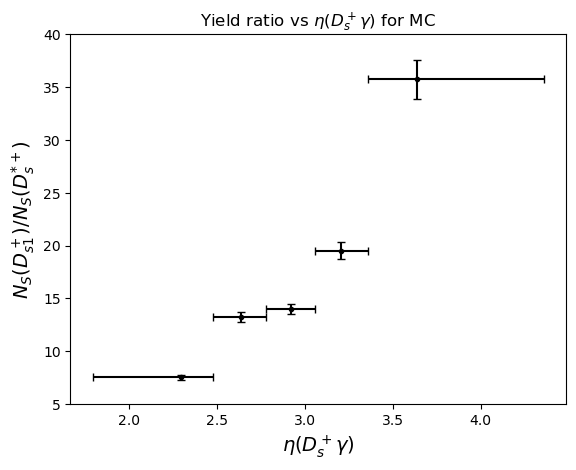

In [21]:
def uratio(a, b, ua, ub):
    ratio = a/b
    uratio = ratio * np.sqrt((ua/a)**2+(ub/b)**2)
    return uratio

MC_Dsg_Dsst_mass_sel_eta_cuts_I = np.array([hist.Integral() for hist in MC_Dsg_Dsst_mass_sel_eta_cuts_hist]) 
MC_Dsg_Ds1_mass_sel_eta_cuts_I  = np.array([hist.Integral() for hist in MC_Dsg_Ds1_mass_sel_eta_cuts_hist]) 

Ds1_Dsst_ratio = MC_Dsg_Ds1_mass_sel_eta_cuts_I / MC_Dsg_Dsst_mass_sel_eta_cuts_I
uDs1_Dsst_ratio = uratio(MC_Dsg_Ds1_mass_sel_eta_cuts_I, MC_Dsg_Dsst_mass_sel_eta_cuts_I,
                         np.sqrt(MC_Dsg_Ds1_mass_sel_eta_cuts_I), np.sqrt(MC_Dsg_Dsst_mass_sel_eta_cuts_I))

plt.figure(1)
plt.errorbar(eta_inter_means, Ds1_Dsst_ratio, yerr=uDs1_Dsst_ratio,
             xerr=[df_Ds1_fits_vals["eta_udown"], df_Ds1_fits_vals["eta_uup"]], 
             fmt='.', color="k", ecolor="k", capsize=3)
plt.ylim(5, 40)
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.ylabel(r"$N_S(D_{s1}^+)/N_S(D_s^{*+})$", fontsize=14)
plt.title("Yield ratio vs $\eta(D_s^+\gamma)$ for MC")
plt.savefig("Graphs/Sim_DsgL_Yield_ratio_vs_eta.pdf", dpi=300, bbox_inches='tight')